<hr style="border-color: black; border-style: groove;">
<center><h3> CS 452/552 Data Science with Python </h3></center>
<center><h3> Project 2 </h3></center>
<center><h3> Batuhan Erden </h3></center>
<center><h3> Sentiment Analysis Tool For English Tweets </h3></center>
<hr style="border-color: black; border-style: groove;">

<h3> Imports </h3>

In [48]:
import csv
import random
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

<h3> Read tweets from csv file </h3>

In [39]:
class Tweet(object):
    
    def __init__(self, tweet, sentiment):
        self.tweet = tweet
        self.sentiment = sentiment

In [40]:
def clean_tweets(tweets):
    for tweet in tweets:
        tweet_cleaned = ""
        words_cleaned = []
        
        for word in tweet.tweet.split():
            if len(word) > 1 and "http://" not in word:
                if word[0] is "@" or word[0] is "#":
                    words_cleaned.append(word[1:])
                else:
                    words_cleaned.append(word)
            
        for i in range(len(words_cleaned)):
            tweet_cleaned += words_cleaned[i]
            
            if i != len(words_cleaned) - 1:
                tweet_cleaned += " "
                
        tweet.tweet = tweet_cleaned

In [41]:
tweets = []

with open("twitter_sentiment_corpus.csv", newline="", encoding="utf8") as dataset:
    reader = csv.DictReader(dataset)
    for row in reader:
        tweets.append(Tweet(row["TweetText"], row["Sentiment"]))
        
clean_tweets(tweets)

<h3> Prepare the dataset </h3>

In [54]:
vectorizer = TfidfVectorizer()
X, y = [], []

for tweet in tweets:
    X.append(tweet.tweet)
    y.append(tweet.sentiment)
    
X = np.asarray(X)
y = np.asarray(y)

X = vectorizer.fit_transform(X)

<h3> Functions to test a Classifier using K-Fold Cross Validation </h3>

In [43]:
def draw_scores(name, scores):
    to_percent = lambda y, pos: str(y * 100) + r"$\%$" if plt.rcParams["text.usetex"] is True else str(y * 100) + "%"
    formatter = FuncFormatter(to_percent)

    plt.title("%s Scores" % name)
    plt.gca().yaxis.set_major_formatter(formatter) 
    plt.plot(scores)
    plt.show()
    
def test_classifier_using_kfold(name, classifier, X, y, k=10):
    scores = []
    kfold = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kfold.split(X):
        classifier.fit(X[train_index], np.take(y, train_index))
        score = classifier.score(X[test_index], np.take(y, test_index))
        
        scores.append(score)
        print("..", end="")
        
    print("\n{} Average Score: {:.2f}%".format(name, np.mean(scores) * 100))
    draw_scores(name, scores)

<h3> Classifiers </h3>
<p> I have tested 5 different Classifiers. Classifiers are sorted from best to worst below. Their performances are: </p>
<b> 1. </b> LinearSVC (<b style="color: green">81.32%</b>)<br/>
<b> 2. </b> MLPClassifier (<b style="color: darkgreen">77.66%</b>)<br/>
<b> 3. </b> MultinomialNB (<b style="color: darkcyan">72.89%</b>)<br/>
<b> 4. </b> BernoulliNB (<b style="color: darkcyan">72.25%</b>)<br/>
<b> 5. </b> SVC (<b style="color: red">45.63%</b>)<br/>

<h3> 1. LinearSVC </h3>

....................
LinearSVC Average Score: 81.32%


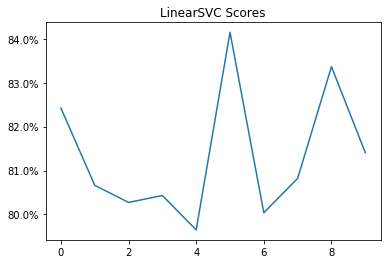

In [47]:
test_classifier_using_kfold("LinearSVC", svm.LinearSVC(C=1.48, loss="hinge"), X, y)

<h3> 2. MLPClassifier </h3>

....................
MLPClassifier Average Score: 77.66%


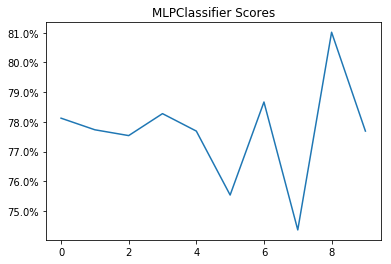

In [15]:
test_classifier_using_kfold("MLPClassifier", MLPClassifier(
    hidden_layer_sizes=(30, 30), solver="adam", activation="relu", max_iter=2000), X, y)

<h3> 3. MultinomialNB </h3>

....................
MultinomialNB Average Score: 72.89%


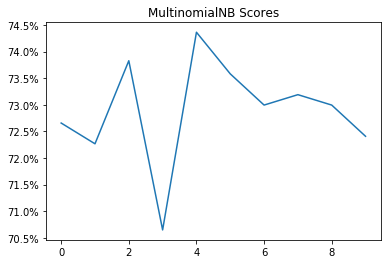

In [45]:
test_classifier_using_kfold("MultinomialNB", MultinomialNB(alpha=.61), X, y)

<h3> 4. BernoulliNB </h3>

....................
BernoulliNB Average Score: 72.25%


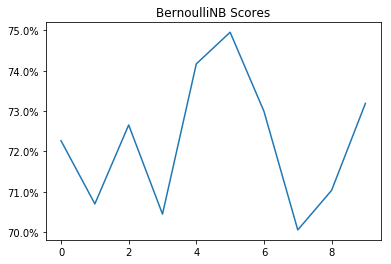

In [17]:
test_classifier_using_kfold("BernoulliNB", BernoulliNB(alpha=1.08), X, y)

<h3> 5. SVC </h3>

....................
SVC Average Score: 45.63%


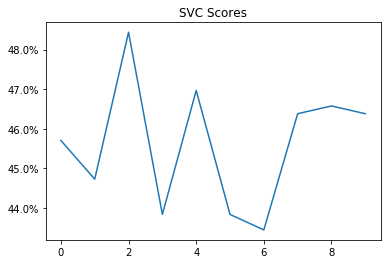

In [18]:
test_classifier_using_kfold("SVC", svm.SVC(), X, y)